In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

#engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
#    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

#heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

heart_df = pd.read_csv('heart.csv')
#engine.dispose()

heart_df.info()
heart_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

X = X.replace(to_replace='?', value=0)

y = np.where(y > 0, 0, 1)

In [ ]:
#Scale / Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)

In [ ]:
k_means = KMeans(n_clusters =2, random_state=42)
%timeit 
y_pred = k_means.fit_predict(X)


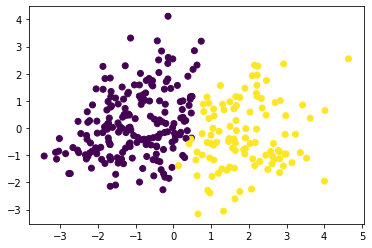

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=y_pred)
plt.show()

In [ ]:
X_pca[:,1]

array([ 2.32127028e+00, -9.57350982e-01,  4.28847737e-02, -4.95337323e-01,
        3.01156175e-01, -3.82882350e-01,  1.46021954e+00, -1.15199470e+00,
        1.17802505e+00,  6.00440468e-02, -4.31111662e-01,  6.66082010e-01,
       -3.62122452e-01, -3.66100880e-01,  3.31505033e+00,  3.38842792e-02,
        1.44304375e+00,  1.56563220e+00, -5.93288357e-01,  2.04509682e+00,
       -7.39533549e-01, -1.05478211e+00, -9.44816640e-01,  9.21609753e-01,
       -1.31154957e+00,  2.60255695e+00,  1.29433620e+00, -1.28905546e+00,
        4.11799172e+00,  6.83863299e-01, -9.04060838e-01, -1.23607299e+00,
       -4.11500959e-01,  3.70030395e-01, -4.34762882e-01, -9.36466989e-02,
        2.27149641e+00,  4.38220805e-01,  2.01456281e+00,  3.21168571e+00,
        1.74775482e+00, -1.64062709e-01, -2.29447547e+00,  5.82251192e-01,
        6.01398620e-01, -4.09448669e-02,  2.12736619e-01,  3.70308829e-01,
        1.42913226e+00,  7.25685018e-01,  1.10788521e+00,  3.97205643e-01,
       -7.42857672e-03, -

In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 0]


In [ ]:
heart_df['clusters'] = y_pred

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clusters
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


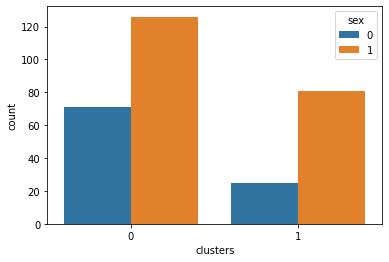

In [ ]:
sns.countplot(x=heart_df.clusters, hue=heart_df.sex)

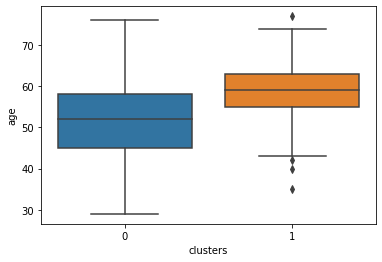

In [ ]:
sns.boxplot(x=heart_df.clusters, y=heart_df.age)